In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder, MinMaxScaler

Data exploration

In [84]:
raw_data = pd.read_csv("/content/ndtv_data_final.csv")

In [85]:
raw_data.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [86]:
raw_data.drop(columns=['Unnamed: 0', 'Name', 'Model'], inplace = True)

In [87]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   1359 non-null   object 
 1   Battery capacity (mAh)  1359 non-null   int64  
 2   Screen size (inches)    1359 non-null   float64
 3   Touchscreen             1359 non-null   object 
 4   Resolution x            1359 non-null   int64  
 5   Resolution y            1359 non-null   int64  
 6   Processor               1359 non-null   int64  
 7   RAM (MB)                1359 non-null   int64  
 8   Internal storage (GB)   1359 non-null   float64
 9   Rear camera             1359 non-null   float64
 10  Front camera            1359 non-null   float64
 11  Operating system        1359 non-null   object 
 12  Wi-Fi                   1359 non-null   object 
 13  Bluetooth               1359 non-null   object 
 14  GPS                     1359 non-null   

In [88]:
raw_data.describe()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


##Preprocessing:
###Change the brand namess to 'Other' if less than 9 data enteries are there

In [89]:
brand_counts = raw_data['Brand'].value_counts()
raw_data['Brand'] = raw_data['Brand'].apply(lambda x: x if brand_counts[x] > 9 else 'Other')

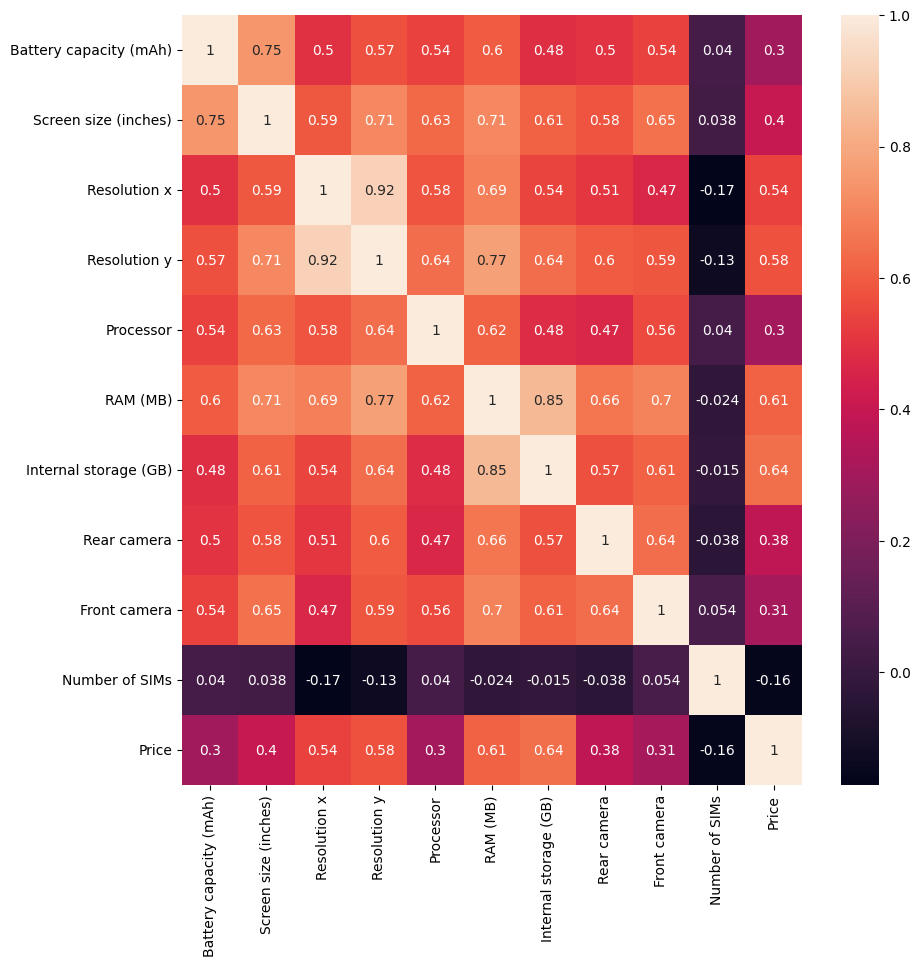

In [90]:
import seaborn as sns

numeric_columns = raw_data.select_dtypes(include = ['int64', 'float64']).columns

plt.figure(figsize = (10,10))
sns.heatmap(raw_data[numeric_columns].corr(), annot = True)
plt.show()

#Handling categorical data

In [91]:
categorical_columns = raw_data.select_dtypes(exclude = ['int64', 'float64']).columns
categorical_data = raw_data[categorical_columns]
categorical_data

,Brand,Touchscreen,Operating system,Wi-Fi,Bluetooth,GPS,3G,4G/ LTE
0,OnePlus,Yes,Android,Yes,Yes,Yes,Yes,Yes
1,Realme,Yes,Android,Yes,Yes,Yes,Yes,Yes
2,Apple,Yes,iOS,Yes,Yes,Yes,Yes,Yes
3,Apple,Yes,iOS,Yes,Yes,Yes,Yes,Yes
4,LG,Yes,Android,Yes,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...
1354,Intex,Yes,Android,Yes,Yes,Yes,Yes,No
1355,Videocon,Yes,Android,Yes,Yes,Yes,Yes,No
1356,Intex,Yes,Android,Yes,Yes,No,Yes,No
1357,iBall,Yes,Android,Yes,Yes,Yes,Yes,No


In [92]:
# categorical_data.drop(columns = ['Brand'], inplace=True)

#Perform Ordinal Encoding

In [93]:
Ordinal_Order = [['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes']]
Columns = [['Touchscreen'], ['Wi-Fi'], ['Bluetooth'], ['GPS'], ['3G'], ['4G/ LTE']]
for order, columns in zip(Ordinal_Order, Columns):
  OE = OrdinalEncoder(categories = [order], dtype = 'int64')
  for column in columns:
    Transformed_column = OE.fit_transform(categorical_data[[column]])
    categorical_data[column] = Transformed_column

/tmp/ipython-input-3369334337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[column] = Transformed_column
/tmp/ipython-input-3369334337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[column] = Transformed_column
/tmp/ipython-input-3369334337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [94]:
categorical_data.head()

,Brand,Touchscreen,Operating system,Wi-Fi,Bluetooth,GPS,3G,4G/ LTE
0,OnePlus,1,Android,1,1,1,1,1
1,Realme,1,Android,1,1,1,1,1
2,Apple,1,iOS,1,1,1,1,1
3,Apple,1,iOS,1,1,1,1,1
4,LG,1,Android,1,1,1,0,0


#Perform OneHotEncoding on two columns: 'Operating system' and 'Brand'

In [95]:
OHE=OneHotEncoder(handle_unknown='ignore', sparse_output=False,dtype='int64').set_output(transform='pandas')
Transformed_data = OHE.fit_transform(categorical_data[['Operating system']])
categorical_data = pd.concat([categorical_data, Transformed_data], axis = 1).drop(columns = ['Operating system'])
categorical_data

,Brand,Touchscreen,Wi-Fi,Bluetooth,GPS,3G,4G/ LTE,Operating system_Android,Operating system_BlackBerry,Operating system_Cyanogen,Operating system_Sailfish,Operating system_Tizen,Operating system_Windows,Operating system_iOS
0,OnePlus,1,1,1,1,1,1,1,0,0,0,0,0,0
1,Realme,1,1,1,1,1,1,1,0,0,0,0,0,0
2,Apple,1,1,1,1,1,1,0,0,0,0,0,0,1
3,Apple,1,1,1,1,1,1,0,0,0,0,0,0,1
4,LG,1,1,1,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,Intex,1,1,1,1,1,0,1,0,0,0,0,0,0
1355,Videocon,1,1,1,1,1,0,1,0,0,0,0,0,0
1356,Intex,1,1,1,0,1,0,1,0,0,0,0,0,0
1357,iBall,1,1,1,1,1,0,1,0,0,0,0,0,0


In [96]:
OHE=OneHotEncoder(handle_unknown='ignore', sparse_output=False,dtype='int64').set_output(transform='pandas')
Transformed_data = OHE.fit_transform(categorical_data[['Brand']])
categorical_data = pd.concat([categorical_data, Transformed_data], axis = 1).drop(columns = ['Brand'])
categorical_data

,Touchscreen,Wi-Fi,Bluetooth,GPS,3G,4G/ LTE,Operating system_Android,Operating system_BlackBerry,Operating system_Cyanogen,Operating system_Sailfish,...,Brand_Tecno,Brand_Videocon,Brand_Vivo,Brand_Xiaomi,Brand_Xolo,Brand_Yu,Brand_Zen,Brand_Zopo,Brand_iBall,Brand_iVoomi
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1355,1,1,1,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1356,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1357,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#Handling numeric data. Scaling.. Extracting Target value i.e price

In [97]:
numeric_data = raw_data[numeric_columns]
Target = numeric_data['Price']
numeric_data.drop(columns=['Price'],inplace=True)

/tmp/ipython-input-3257529346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data.drop(columns=['Price'],inplace=True)


In [98]:
# for column in numeric_columns:
#   plt.figure(figsize=(10,5))
#   plt.subplot(1,2,1)
#   sns.distplot(numeric_data[column])

#   plt.subplot(1,2,2)
#   sns.boxplot(numeric_data[column])

#   plt.show()

In [99]:
numeric_features = numeric_data.columns

In [100]:
numeric_features

Index(['Battery capacity (mAh)', 'Screen size (inches)', 'Resolution x',
       'Resolution y', 'Processor', 'RAM (MB)', 'Internal storage (GB)',
       'Rear camera', 'Front camera', 'Number of SIMs'],
      dtype='object')

In [101]:
Scaler = StandardScaler()
Scaler = MinMaxScaler()
ScaledData = Scaler.fit_transform(numeric_data)

In [102]:
ScaledData = pd.DataFrame(ScaledData, columns=numeric_features)
ScaledData

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs
0,0.616232,0.871429,0.625000,0.795455,0.777778,1.000000,0.499937,0.444444,0.333333,0.5
1,0.599198,0.836735,0.437500,0.590909,0.777778,0.497319,0.124891,0.592593,0.333333,0.5
2,0.592986,0.836735,0.521875,0.672727,0.555556,0.329759,0.124891,0.111111,0.250000,0.5
3,0.420842,0.755102,0.306250,0.418182,0.555556,0.329759,0.124891,0.111111,0.250000,0.5
4,0.599198,0.816327,0.437500,0.573864,0.777778,0.497319,0.249906,0.111111,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...
1354,0.098196,0.326531,0.125000,0.136364,0.333333,0.037534,0.015502,0.046296,0.006250,0.5
1355,0.198397,0.530612,0.125000,0.151705,0.333333,0.078418,0.015502,0.074074,0.104167,0.5
1356,0.138277,0.428571,0.125000,0.151705,0.111111,0.037534,0.007688,0.046296,0.041667,0.5
1357,0.048096,0.326531,0.125000,0.136364,0.000000,0.016086,0.000875,0.018519,0.006250,0.5


#Concatinating scaled numeric data and encoded categorical data

In [103]:
Processed_data = pd.concat([ScaledData, categorical_data], axis = 1)
Column_names = Processed_data.columns
Processed_data

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,...,Brand_Tecno,Brand_Videocon,Brand_Vivo,Brand_Xiaomi,Brand_Xolo,Brand_Yu,Brand_Zen,Brand_Zopo,Brand_iBall,Brand_iVoomi
0,0.616232,0.871429,0.625000,0.795455,0.777778,1.000000,0.499937,0.444444,0.333333,0.5,...,0,0,0,0,0,0,0,0,0,0
1,0.599198,0.836735,0.437500,0.590909,0.777778,0.497319,0.124891,0.592593,0.333333,0.5,...,0,0,0,0,0,0,0,0,0,0
2,0.592986,0.836735,0.521875,0.672727,0.555556,0.329759,0.124891,0.111111,0.250000,0.5,...,0,0,0,0,0,0,0,0,0,0
3,0.420842,0.755102,0.306250,0.418182,0.555556,0.329759,0.124891,0.111111,0.250000,0.5,...,0,0,0,0,0,0,0,0,0,0
4,0.599198,0.816327,0.437500,0.573864,0.777778,0.497319,0.249906,0.111111,0.666667,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,0.098196,0.326531,0.125000,0.136364,0.333333,0.037534,0.015502,0.046296,0.006250,0.5,...,0,0,0,0,0,0,0,0,0,0
1355,0.198397,0.530612,0.125000,0.151705,0.333333,0.078418,0.015502,0.074074,0.104167,0.5,...,0,1,0,0,0,0,0,0,0,0
1356,0.138277,0.428571,0.125000,0.151705,0.111111,0.037534,0.007688,0.046296,0.041667,0.5,...,0,0,0,0,0,0,0,0,0,0
1357,0.048096,0.326531,0.125000,0.136364,0.000000,0.016086,0.000875,0.018519,0.006250,0.5,...,0,0,0,0,0,0,0,0,1,0


##Model training

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Processed_data, Target, test_size = 0.2, random_state = 42)

In [105]:
from sklearn.linear_model import LinearRegression

RE = LinearRegression()
RE.fit(X_train, y_train)

LinearRegression()

##Model Evaluation

In [106]:
from sklearn.metrics import classification_report
y_predicted = RE.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)

In [108]:
mse

80453282.16600361

In [109]:
rmse = np.sqrt(mse)
rmse

np.float64(8969.575361520947)

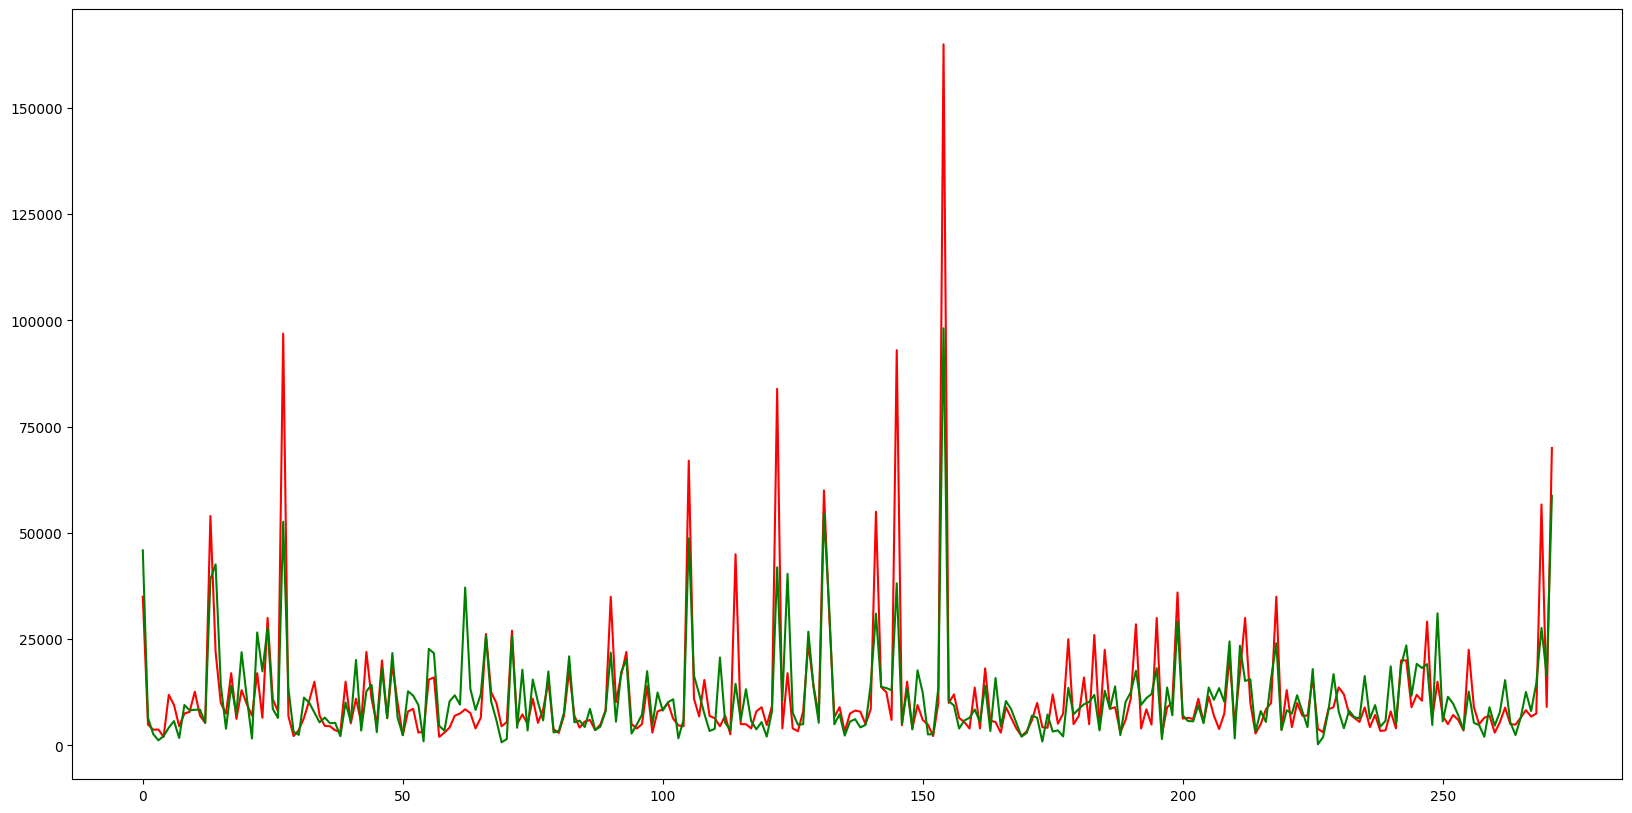

In [111]:
plt.figure(figsize = (20, 10))
plt.plot(range(len(y_test)), y_test, color = 'red')
plt.plot(range(len(y_predicted)), y_predicted, color = 'green')
plt.show()